<a href="https://colab.research.google.com/github/SMKProj/WebScraping/blob/main/BloacketBostadAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('bostad.txt')
df1.head(7)

,Title,Location,Type,Rooms,Size (m²),Start,End,Price,Link
0,Ekensbergsvägen,Stockholm,Apartment,2.0,28,2023-10-01,2024-09-30,"SEK 12,500",https://bostad.blocket.se/p2/en/home/676664/
1,Reginavägen,Malmö,Terrace house,3.0,72,Now,Until further notice,"SEK 25,500",https://bostad.blocket.se/p2/en/home/676663/
2,Allmogevägen,Järfälla,Apartment,2.0,65,Now,Until further notice,"SEK 15,742",https://bostad.blocket.se/p2/en/home/429113/
3,Hagmarksgatan,Linköping,Apartment,3.0,82,2024-01-01,Until further notice,"SEK 8,975",https://bostad.blocket.se/p2/en/home/676661/
4,Gullvivegränd,Hässelby,House,5.0,140,2023-12-01,Until further notice,"SEK 30,435",https://bostad.blocket.se/p2/en/home/676644/
5,Tornérplatsen,Järfälla,Apartment,2.5,70,Now,Until further notice,"SEK 14,693",https://bostad.blocket.se/p2/en/home/676660/
6,Osbacksvägen,Norrtälje,Apartment,5.0,105,2023-11-01,Until further notice,"SEK 17,249",https://bostad.blocket.se/p2/en/home/676654/


In [ ]:
df1.shape

(950, 9)

In [ ]:
df1.isnull().sum()

Title        0
Location     0
Type         0
Rooms        0
Size (m²)    0
Start        0
End          0
Price        0
Link         0
dtype: int64

In [ ]:
df2 = pd.read_csv('bostad2.txt')
df2.head(7)

,ID,Published,Type,Furnished,Accomodate,Description,LandLord,Address,City,Rooms,Size (m²),Kitchen,Bathroom
0,676664,15 September 13:56,Apartment,Yes,2,Möblerad 2:a - Gröndal - Ett år I ...,Be Resident AB,Ekensbergsvägen,Stockholm,2,28.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."
1,676663,15 September 13:56,Terrace house,Yes,6,Corporate housing: Apartment of 72 sqm ...,YourStay Sweden,Reginavägen,Malmö,3,72.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."
2,429113,15 September 13:51,Apartment,No,2,En stor nyrenoverad lägenhet nära Jakobsberg c...,Somia,Allmogevägen,Järfälla,2,65.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."
3,676661,15 September 13:50,Apartment,No,2,3 rum och kök Ledig 1 januari Pa...,TG FASTIGHETER,Hagmarksgatan,Linköping,3,82.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."
4,676644,15 September 13:48,House,Yes,4,Detta är ett område som erbjuder det mesta och...,Haroon,Gullvivegränd,Hässelby,5,140.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."
5,676660,15 September 13:47,Apartment,Yes,2,"Lägenheten är placerat på Jakobsbergs centrum,...",Fredrik Nils Lennart,Tornérplatsen,Järfälla,2.5,70.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."
6,676654,15 September 13:47,Apartment,No,6,Möjligt att hyra depositionsfritt genom Samtry...,Not found,Osbacksvägen,Norrtälje,5,105.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach..."


In [ ]:
df2.shape

(950, 13)

In [ ]:
df2.isnull().sum()

ID             0
Published      0
Type           0
Furnished      0
Accomodate     0
Description    0
LandLord       0
Address        0
City           0
Rooms          0
Size (m²)      4
Kitchen        0
Bathroom       0
dtype: int64

In [ ]:
index = df2['Size (m²)'].index[df2['Size (m²)'].apply(np.isnan)]
index

Int64Index([357, 406, 579, 896], dtype='int64')

In [ ]:
df1 = df1.drop(index)
df1 = df1.reset_index(drop=True)
df1.shape

(946, 9)

In [ ]:
df2 = df2.dropna().reset_index(drop=True)
df2.shape

(946, 13)

In [ ]:
selectedCol = df1[['Price','Start','End']]
df = df2.join(selectedCol, how='outer')

In [ ]:
df.head(5)

,ID,Published,Type,Furnished,Accomodate,Description,LandLord,Address,City,Rooms,Size (m²),Kitchen,Bathroom,Price,Start,End,Price Category,Size Categories
0,676664,15 September 13:56,Apartment,Yes,2,Möblerad 2:a - Gröndal - Ett år I ...,Be Resident AB,Ekensbergsvägen,Stockholm,2.0,28.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",12500,2023-10-01,2024-09-30,Medium,Small
1,676663,15 September 13:56,Terrace house,Yes,6,Corporate housing: Apartment of 72 sqm ...,YourStay Sweden,Reginavägen,Malmö,3.0,72.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",25500,Now,Until further notice,Very High,Large
2,429113,15 September 13:51,Apartment,No,2,En stor nyrenoverad lägenhet nära Jakobsberg c...,Somia,Allmogevägen,Järfälla,2.0,65.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",15742,Now,Until further notice,High,Large
3,676661,15 September 13:50,Apartment,No,2,3 rum och kök Ledig 1 januari Pa...,TG FASTIGHETER,Hagmarksgatan,Linköping,3.0,82.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",8975,2024-01-01,Until further notice,Small,Very Large
4,676644,15 September 13:48,House,Yes,4,Detta är ett område som erbjuder det mesta och...,Haroon,Gullvivegränd,Hässelby,5.0,140.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",30435,2023-12-01,Until further notice,Very Very High,Extra Large


In [ ]:
df.shape

(946, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           946 non-null    object 
 1   Published    946 non-null    object 
 2   Type         946 non-null    object 
 3   Furnished    946 non-null    object 
 4   Accomodate   946 non-null    object 
 5   Description  946 non-null    object 
 6   LandLord     946 non-null    object 
 7   Address      946 non-null    object 
 8   City         946 non-null    object 
 9   Rooms        946 non-null    object 
 10  Size (m²)    946 non-null    float64
 11  Kitchen      946 non-null    object 
 12  Bathroom     946 non-null    object 
 13  Price        946 non-null    object 
 14  Start        946 non-null    object 
 15  End          946 non-null    object 
dtypes: float64(1), object(15)
memory usage: 118.4+ KB


In [ ]:
df['Price'] = df['Price'].str.lstrip('SEK')
df['Price']= [int(p.replace(',', '')) for p in df['Price']]
df['Rooms']= [float(p) for p in df['Rooms']]
df['Accomodate']= [int(a) for a in df['Accomodate']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           946 non-null    object 
 1   Published    946 non-null    object 
 2   Type         946 non-null    object 
 3   Furnished    946 non-null    object 
 4   Accomodate   946 non-null    int64  
 5   Description  946 non-null    object 
 6   LandLord     946 non-null    object 
 7   Address      946 non-null    object 
 8   City         946 non-null    object 
 9   Rooms        946 non-null    float64
 10  Size (m²)    946 non-null    float64
 11  Kitchen      946 non-null    object 
 12  Bathroom     946 non-null    object 
 13  Price        946 non-null    int64  
 14  Start        946 non-null    object 
 15  End          946 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 118.4+ KB


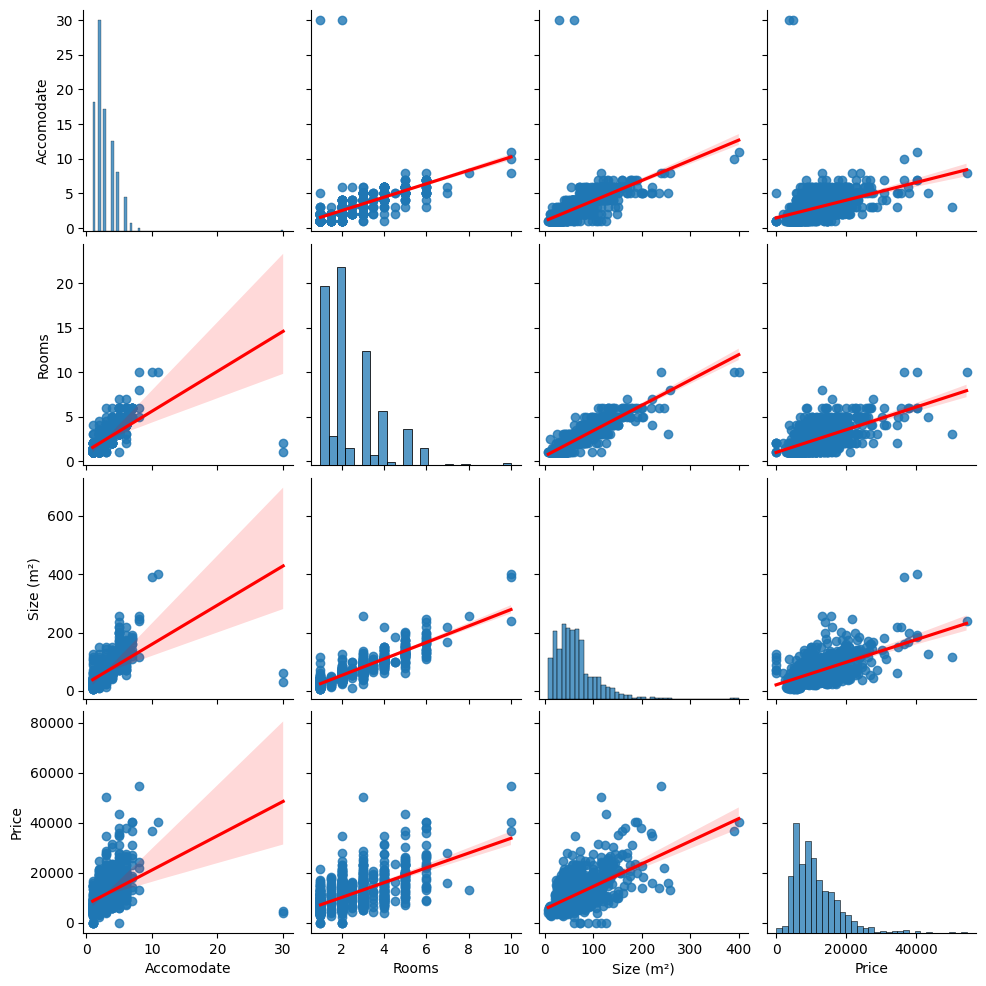

In [ ]:
sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [ ]:
print('Correlation Value for Price and Size is: ', np.round((df['Price'].corr(df['Size (m²)'])*100),2) ,'%')
print('Correlation Value for Size and Rooms is: ', np.round((df['Rooms'].corr(df['Size (m²)'])*100),2),'%')
print('Correlation Value for Price and Rooms is: ', np.round((df['Price'].corr(df['Rooms'])*100),2),'%')
print('Correlation Value for Price and Accomodate is: ', np.round((df['Price'].corr(df['Accomodate'])*100),2),'%')
print('Correlation Value for Size and Accomodate is: ', np.round((df['Size (m²)'].corr(df['Accomodate'])*100),2),'%')

Correlation Value for Price and Size is:  59.08 %
Correlation Value for Size and Rooms is:  89.69 %
Correlation Value for Price and Rooms is:  61.42 %
Correlation Value for Price and Accomodate is:  41.83 %
Correlation Value for Size and Accomodate is:  62.54 %


In [ ]:
thresholds = [0, 10000, 15000, 20000, 30000, float('inf')]
categories = ['Small', 'Medium', 'High', 'Very High', 'Very Very High']
df['Price Category'] = pd.cut(df['Price'], bins=thresholds, labels=categories)

In [ ]:
priceCat = pd.crosstab(df['Price Category'], df['Price']).sum(axis=1).astype('float')
priceCat

Price Category
Small             495.0
Medium            241.0
High              130.0
Very High          62.0
Very Very High     18.0
dtype: float64

Text(0.5, 1.0, 'Price Categories Distribution')

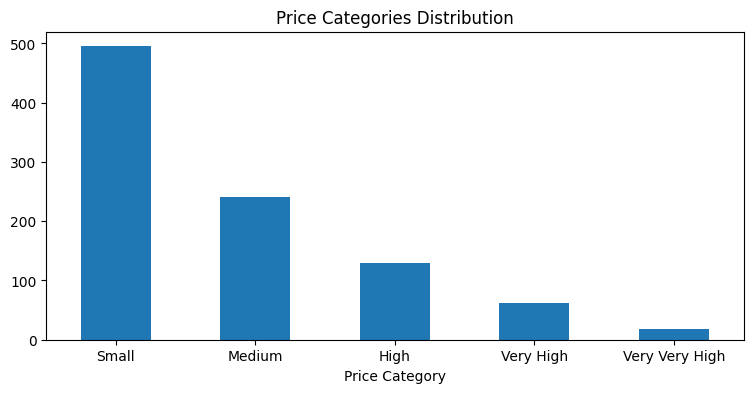

In [ ]:
priceCat.plot(kind='bar', rot=0, figsize=(9, 4))
range = ['Small(0-10000)', 'Medium(10000-15000)', 'High(15000-20000)', 'VeryHigh(20000-30000)', 'VeryVeryHigh(30000-)']
plt.title('Price Categories Distribution')#, y=1.10,loc='r')
#plt.title(range, fontsize=8, color='blue', loc='center')

In [ ]:
sizeThresholds = [0, 30, 60, 80, 100, float('inf')]
sizeCategories = ['Small', 'Medium', 'Large', 'Very Large', 'Extra Large']
df['Size Categories'] = pd.cut(df['Size (m²)'], bins=sizeThresholds, labels=sizeCategories)

In [ ]:
sizeCat = pd.crosstab(df['Size Categories'], df['Size (m²)']).sum(axis=1).astype('float')
sizeCat

Size Categories
Small          201.0
Medium         324.0
Large          192.0
Very Large      85.0
Extra Large    144.0
dtype: float64

Text(0.5, 1.0, 'Size Categories Distribution')

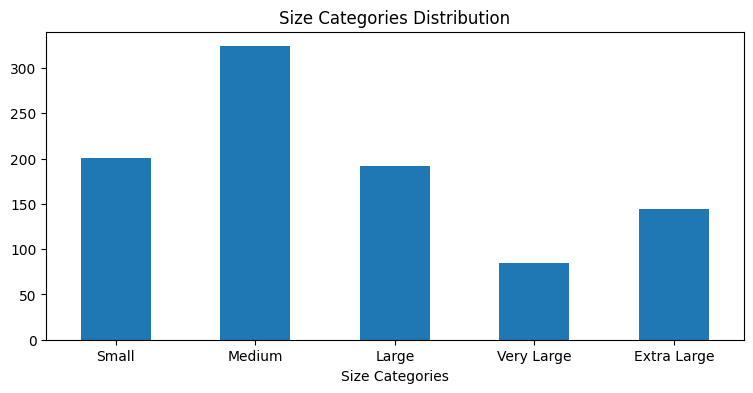

In [ ]:
sizeCat.plot(kind='bar', rot=0, figsize=(9, 4))
range = ['Small(0-30)', 'Medium(30-60)', 'Large(60-80)', 'VeryLarge(80-100)', 'ExtraLarge(100-)']
plt.title('Size Categories Distribution')#, y=1.10,loc='right')
#plt.title(range, fontsize=8, color='blue', loc='center')

In [ ]:
newdf = df[df['City'].str.contains('|'.join(['Stockholm','Malmö','Göteborg','Solna']))]

In [ ]:
newdf.head()

,ID,Published,Type,Furnished,Accomodate,Description,LandLord,Address,City,Rooms,Size (m²),Kitchen,Bathroom,Price,Start,End,Price Category,Size Categories
0,676664,15 September 13:56,Apartment,Yes,2,Möblerad 2:a - Gröndal - Ett år I ...,Be Resident AB,Ekensbergsvägen,Stockholm,2.0,28.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",12500,2023-10-01,2024-09-30,Medium,Small
1,676663,15 September 13:56,Terrace house,Yes,6,Corporate housing: Apartment of 72 sqm ...,YourStay Sweden,Reginavägen,Malmö,3.0,72.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",25500,Now,Until further notice,Very High,Large
7,676657,15 September 13:46,Apartment,Yes,3,Möjligt att hyra depositionsfritt genom Samtry...,Samtrygg AB,Torsgatan,Stockholm,2.0,62.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",34500,2023-10-01,2024-05-31,Very Very High,Large
9,676656,15 September 13:44,Apartment,Yes,2,"Mysig 1,5:a i hjärtat av SoFo. Fin balkong i s...",Not found,Gotlandsgatan,Stockholm,1.5,42.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",11544,Now,Until further notice,Medium,Medium
15,676648,15 September 13:31,Apartment,Yes,3,Möjligt att hyra depositionsfritt genom Samtry...,Samtrygg AB,Förrådsgatan,Solna,2.0,48.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",21274,2023-11-01,Until further notice,Very High,Medium


**Count of Residences per Cities**

In [ ]:
rc_per_city = pd.crosstab(newdf['City'], newdf.index).sum(axis=1).astype('int')
rc_per_city

City
 Göteborg           40
 Malmö              17
 Solna              14
 Stockholm          71
 Årsta Stockholm     1
dtype: int64

<Axes: title={'center': 'Count of Residence per City'}, xlabel='City'>

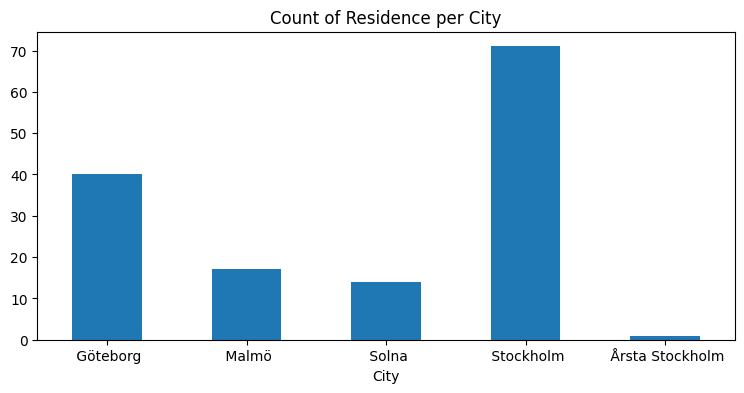

In [ ]:
rc_per_city.plot(kind='bar',rot=0, figsize=(9,4), title='Count of Residence per City')

<Axes: title={'center': 'Residence Type per City'}, xlabel='Type'>

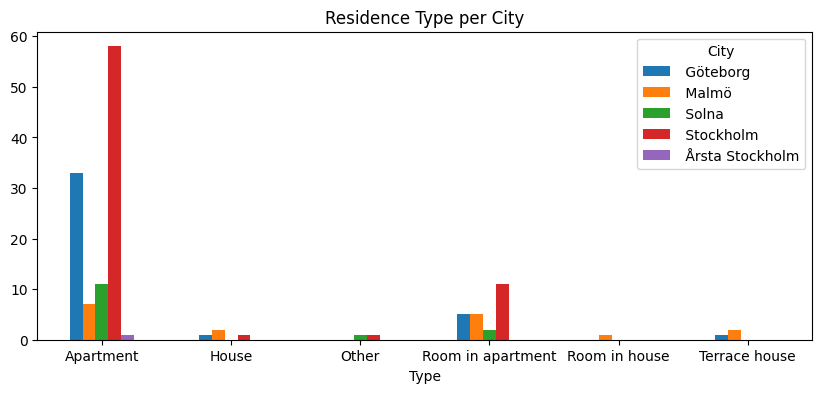

In [ ]:
pd.crosstab(newdf['Type'], newdf['City']).plot(kind='bar',rot=0, figsize=(10,4), title='Residence Type per City')

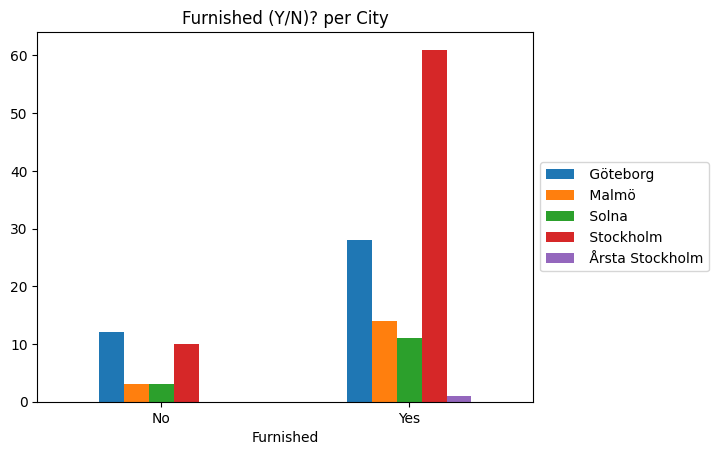

In [ ]:
pd.crosstab(newdf['Furnished'], newdf['City']).plot(kind='bar', rot=0, title='Furnished (Y/N)? per City')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, "['Small(0-30)', 'Medium(30-60)', 'Large(60-80)', 'VeryLarge(80-100)', 'ExtraLarge(100-)']")

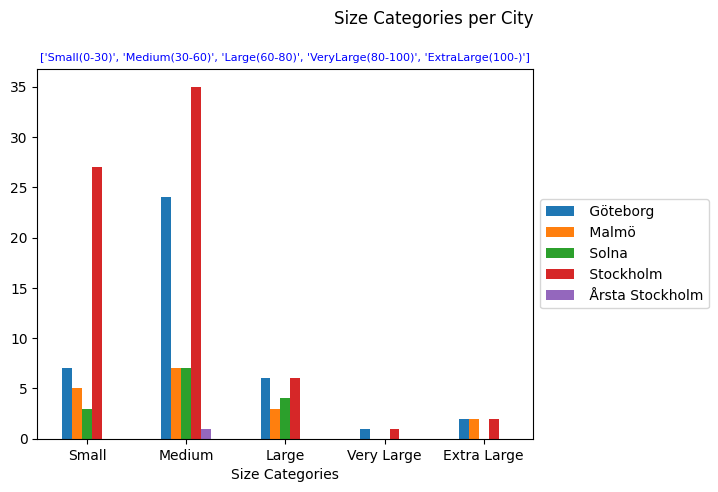

In [ ]:
pd.crosstab(newdf['Size Categories'], newdf['City']).plot(kind='bar', rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
range = ['Small(0-30)', 'Medium(30-60)', 'Large(60-80)', 'VeryLarge(80-100)', 'ExtraLarge(100-)']
plt.title('Size Categories per City', y=1.10,loc='right')
plt.title(range, fontsize=8, color='blue', loc='center')

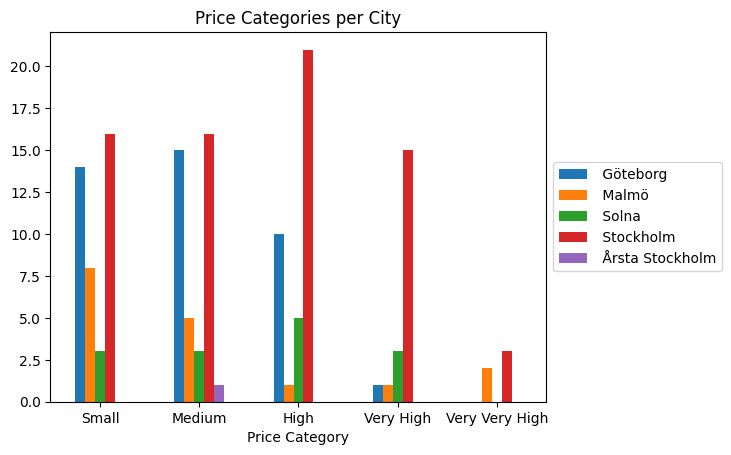

In [ ]:
pd.crosstab(newdf['Price Category'], newdf['City']).plot(kind='bar', rot=0, title='Price Categories per City')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

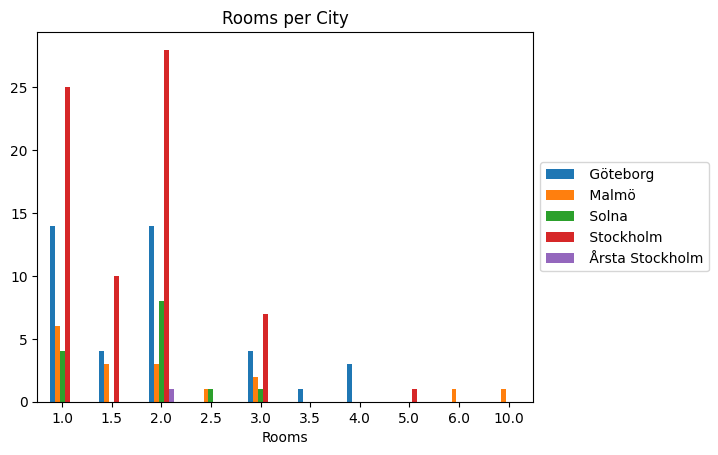

In [ ]:
pd.crosstab(newdf['Rooms'], newdf['City']).plot(kind='bar', rot=0, title='Rooms per City')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Observing number of people to accomodate per city**

In [ ]:
acc_df = newdf.sort_values(by=['Accomodate'])

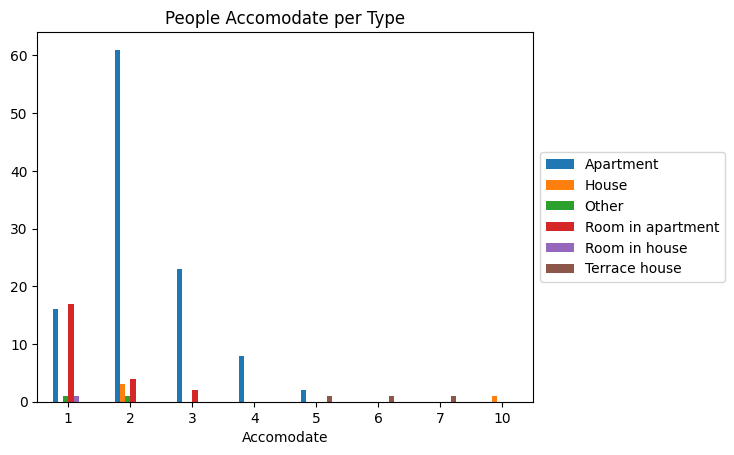

In [ ]:
pd.crosstab(acc_df['Accomodate'], acc_df['Type']).plot(kind='bar', rot=0, title='People Accomodate per Type')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
newdf['LandLord'].unique()

array(['Be Resident AB', 'YourStay Sweden', 'Samtrygg AB', 'Not found',
       'Danayit Habtemichael', 'Felix', 'Amir', 'Tanja',
       'Anna Sara Marie', 'Åsa Viola', 'Maryam', 'MKLBYGGAB', 'Ellen',
       'Juan Carlos', 'Elif yilmaz', 'Timur', 'Jenny Ann', 'Bengt',
       'Adrian', 'John Alexander', 'Peshrao', 'Lena', 'Klara', 'Peter',
       'Helena', 'Aida', 'Sadete', 'Caroline', 'Åmyne Fastigheter',
       'Marie Lise-lott C', 'Jokke', 'Alan Robert', 'Mikael', 'Aram',
       'Sara Martina', 'Anita', 'Pedro', 'Johan', 'Ayse', 'Maria',
       'Danial Ali', 'Isabel', 'Olinda', 'Zheng',
       'Jonathan André Jakob Olof', 'Syed Abbas Ghazanfar', 'Sally ',
       'Sara', 'Hulya', 'Patrik Ola Torsten', 'Ann-christine', 'Lina',
       'Amanda', 'Alice Maja', 'Fanny Antonia Marie', 'Alexander',
       'Niklas', 'Margareta', 'Samuel Tor', 'Mustafa', 'Per Otto',
       'Soheila', 'Ann-marie', 'Anders', 'Sofia', 'Gregory', 'Robert Hu',
       'Miriam ', 'Nick', 'Karlsson', 'Elias', 'Moa', 'E

In [ ]:
busAds = ['Be Resident AB','YourStay Sweden', 'Samtrygg AB','Passion for Homes','Vivamus Living AB']
newdf['Landlords Category'] = ['Business' if c in busAds else 'Private' for c in newdf['LandLord']]


<ipython-input-44-66a05e9101b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Landlords Category'] = ['Business' if c in busAds else 'Private' for c in newdf['LandLord']]


In [ ]:
newdf.head(10)

,ID,Published,Type,Furnished,Accomodate,Description,LandLord,Address,City,Rooms,Size (m²),Kitchen,Bathroom,Price,Start,End,Price Category,Size Categories,Landlords Category
0,676664,15 September 13:56,Apartment,Yes,2,Möblerad 2:a - Gröndal - Ett år I ...,Be Resident AB,Ekensbergsvägen,Stockholm,2.0,28.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",12500,2023-10-01,2024-09-30,Medium,Small,Business
1,676663,15 September 13:56,Terrace house,Yes,6,Corporate housing: Apartment of 72 sqm ...,YourStay Sweden,Reginavägen,Malmö,3.0,72.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",25500,Now,Until further notice,Very High,Large,Business
7,676657,15 September 13:46,Apartment,Yes,3,Möjligt att hyra depositionsfritt genom Samtry...,Samtrygg AB,Torsgatan,Stockholm,2.0,62.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",34500,2023-10-01,2024-05-31,Very Very High,Large,Business
9,676656,15 September 13:44,Apartment,Yes,2,"Mysig 1,5:a i hjärtat av SoFo. Fin balkong i s...",Not found,Gotlandsgatan,Stockholm,1.5,42.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",11544,Now,Until further notice,Medium,Medium,Private
15,676648,15 September 13:31,Apartment,Yes,3,Möjligt att hyra depositionsfritt genom Samtry...,Samtrygg AB,Förrådsgatan,Solna,2.0,48.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",21274,2023-11-01,Until further notice,Very High,Medium,Business
26,676619,15 September 13:06,Apartment,Yes,1,Då våran nyvaradnde hyresgäst skall återvända ...,Danayit Habtemichael,Segelmakaregatan,Göteborg,1.0,24.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",8920,2023-10-23,Until further notice,Small,Small,Private
27,676630,15 September 13:06,Apartment,Yes,2,Då jag ska börja studera till hösten i Uppsala...,Felix,Rindögatan,Stockholm,2.0,44.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",16792,Now,Until further notice,High,Medium,Private
28,676625,15 September 13:02,Apartment,Yes,2,"En fin och ljus lägenhet i Kvillebäcken, Göte...",Amir,Rundbäcksgatan,Göteborg,2.0,56.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",16792,2023-10-01,2024-04-01,High,Medium,Private
30,676612,15 September 12:52,Apartment,Yes,2,En liten men otroligt välplanerad 2a för helst...,Tanja,Ninni Kronbergs Gata,Stockholm,2.0,42.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",20465,2023-10-07,2024-07-31,Very High,Medium,Private
32,640380,22 July 15:11,House,Yes,2,BBo granne med oss?\n\nVi funderar på att hyra...,Anna Sara Marie,Ålkistevägen,Stockholm,1.5,40.0,"['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...","['Shower', 'Toilet', 'Washroom', 'Washing mach...",18156,2023-09-17,Until further notice,High,Medium,Private


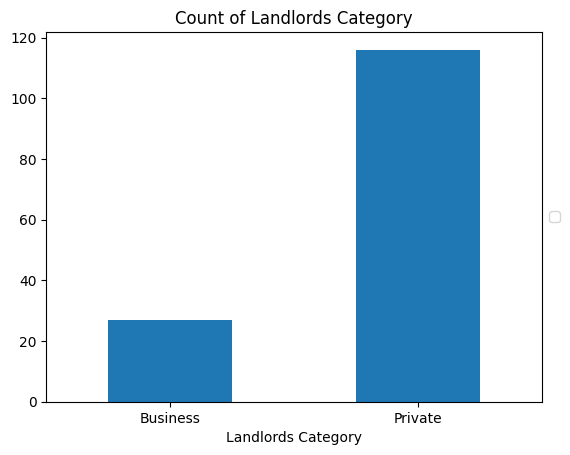

In [ ]:
pd.crosstab(newdf['Landlords Category'], newdf['City']).sum(axis=1).plot(kind='bar', rot=0, title='Count of Landlords Category')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

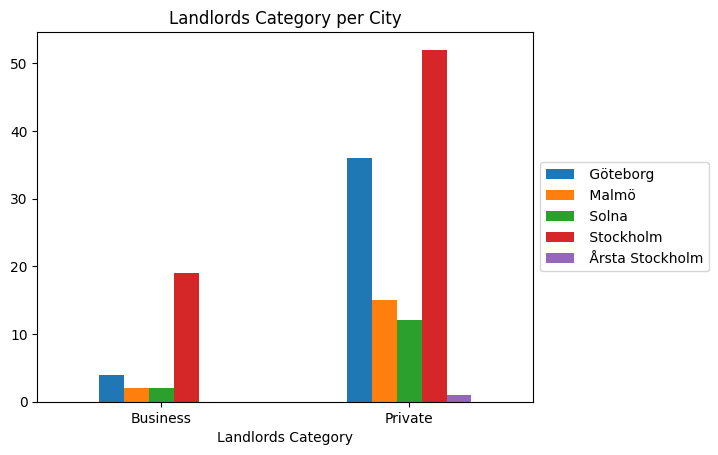

In [ ]:
pd.crosstab(newdf['Landlords Category'], newdf['City']).plot(kind='bar', rot=0, title='Landlords Category per City')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
newdf['Kitchen']

0      ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
1      ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
7      ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
9      ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
15     ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
                             ...                        
901    ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
910    ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
935    ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
938    ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
943    ['Kitchen', 'Fridge', 'Freezer', 'Oven', 'Stov...
Name: Kitchen, Length: 143, dtype: object